In [8]:
#normal packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sk-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluation models

from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score 
from sklearn.metrics import RocCurveDisplay 



In [17]:
df = pd.read_csv("heart-disease (1).csv")
df.shape


(303, 14)

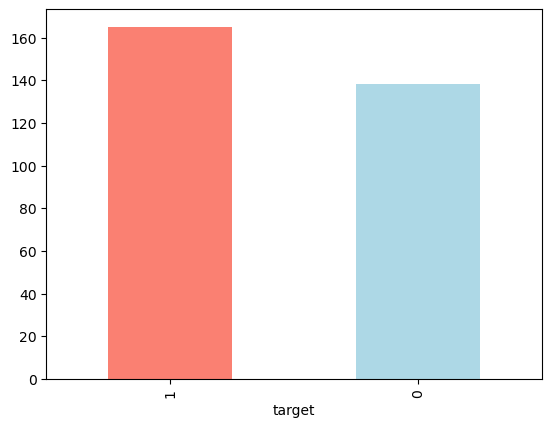

In [21]:
df["target"].value_counts().plot(kind="bar" , color=['salmon','lightblue']);

In [22]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

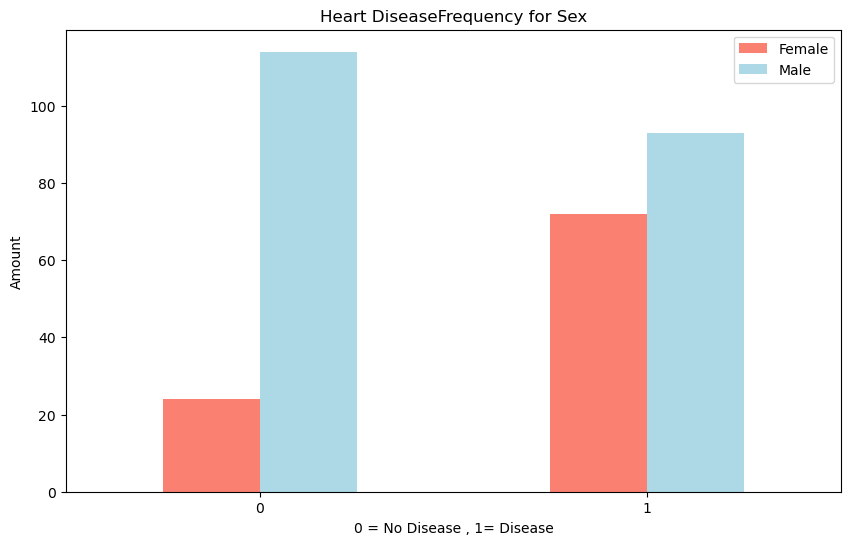

In [29]:
# create a plot of crosstab for sex

pd.crosstab(df.target , df.sex).plot(kind="bar",
                                    figsize = (10,6),
                                    color =["salmon","lightblue"])
plt.title("Heart DiseaseFrequency for Sex")
plt.xlabel("0 = No Disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"])
plt.xticks(rotation=0);

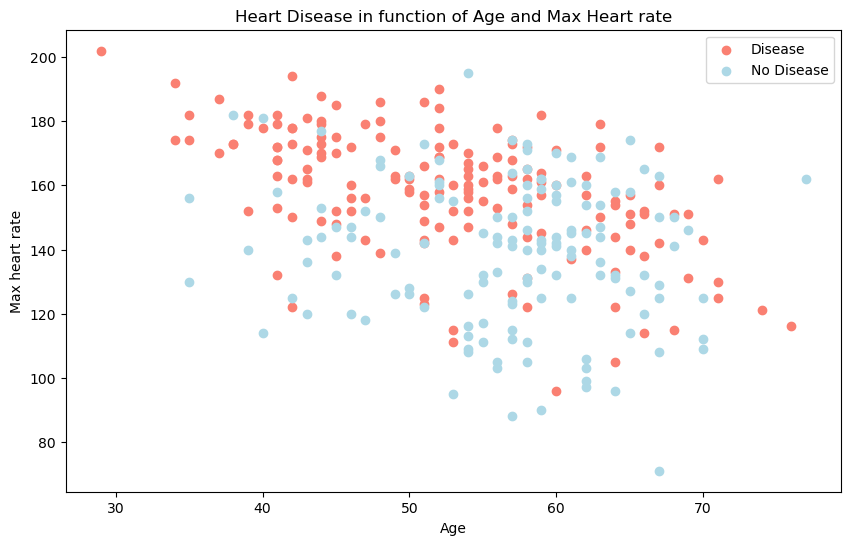

In [33]:
# Age vs Max heart rate
plt.figure(figsize=(10,6))

#plot with heart diseases
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")

# plot without the heart diseases
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

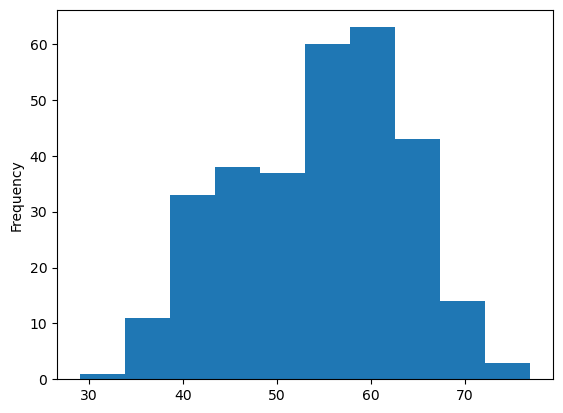

In [34]:
# check the distribution of age

df.age.plot.hist();

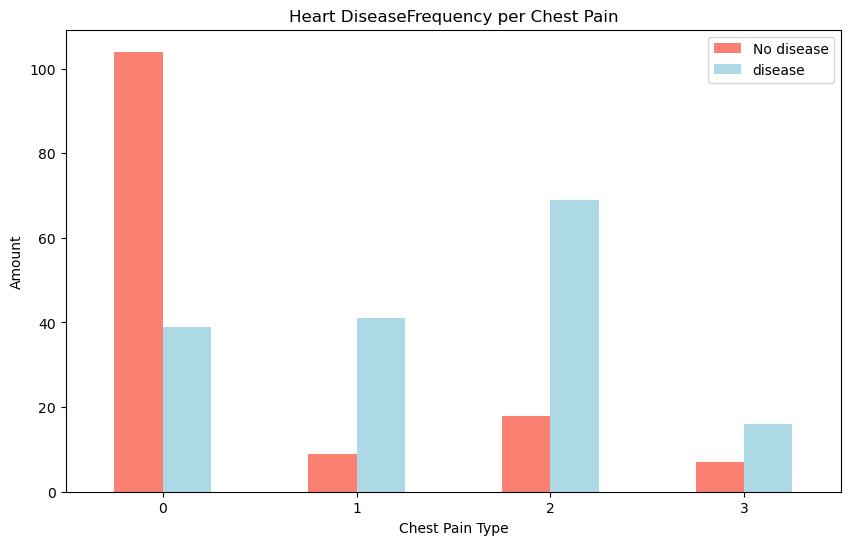

In [35]:
# create a plot of crosstab for chest pain

pd.crosstab(df.cp , df.target).plot(kind="bar",
                                    figsize = (10,6),
                                    color =["salmon","lightblue"])
plt.title("Heart DiseaseFrequency per Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease" , "disease"])
plt.xticks(rotation=0);

In [36]:
# corrolation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


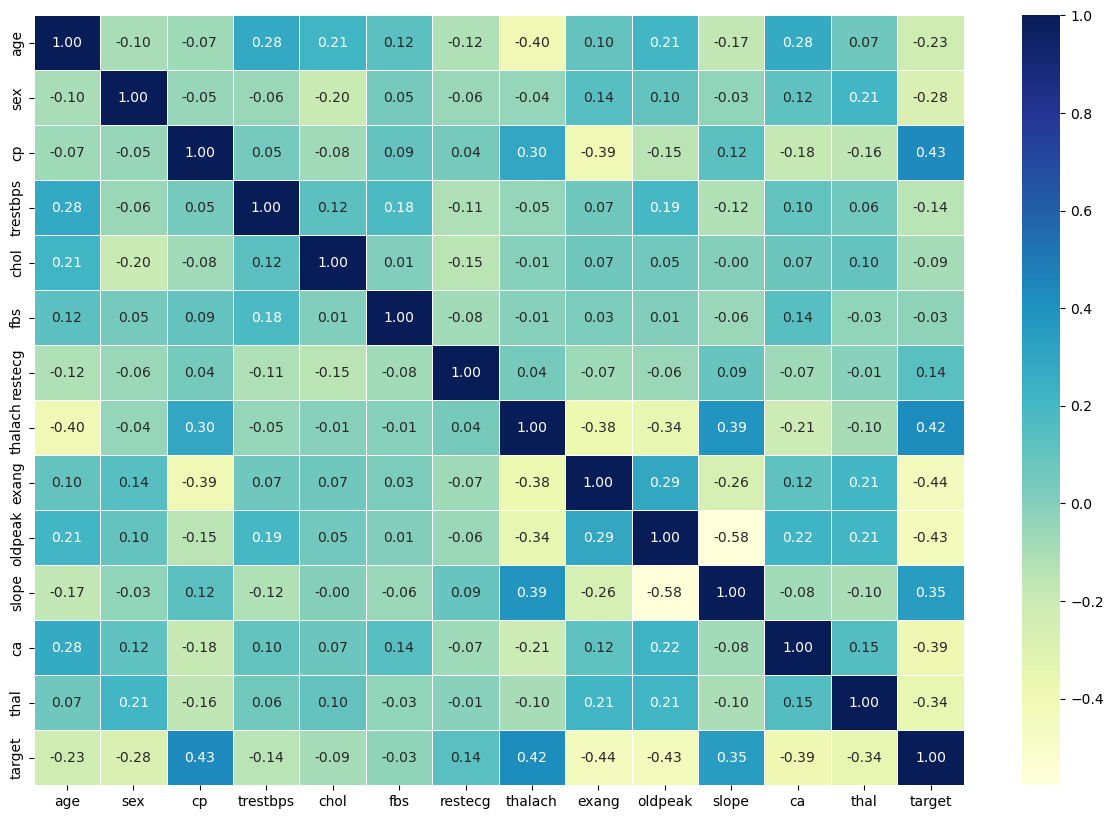

In [37]:
corr_matrix = df.corr()

fig , ax  =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");


Modelling our machine learning algorithm

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
# split data into x and y
x= df.drop("target" , axis=1)
y=df["target"]

In [40]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [41]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [42]:
# spliting the data into train and test sets

np.random.seed(42)

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2)

In [43]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [44]:
# Trying three machine learning models

models ={"logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()
}

#creating a function to fit and score the model

def fit_and_score(models , x_train ,x_test , y_train , y_test):
    np.random.seed(42)
    model_scores ={}
    
    for name,model in models.items():
        model.fit(x_train , y_train)
        
        model_scores[name] = model.score(x_test , y_test)
    return model_scores



In [46]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

model_scores

C:\Users\lenovo\Desktop\project-1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

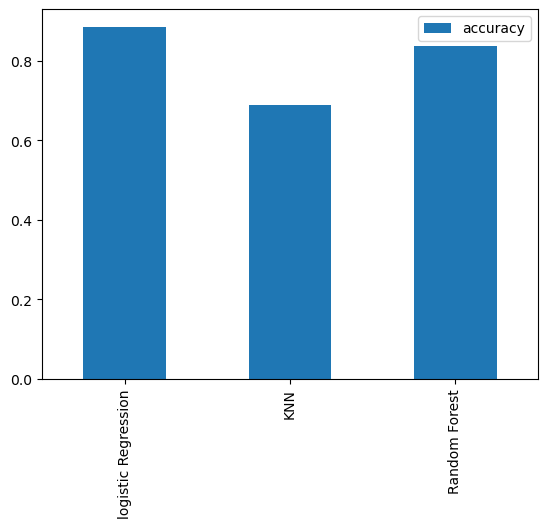

In [47]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot.bar();

In [50]:
# let me tune the modes

# 1. hyper parameter tuning on KNN model

train_scores =[]
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors =i )
    knn.fit(x_train , y_train)
    
    train_scores.append(knn.score(x_train , y_train))
    test_scores.append(knn.score(x_test,y_test))



In [51]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41% 


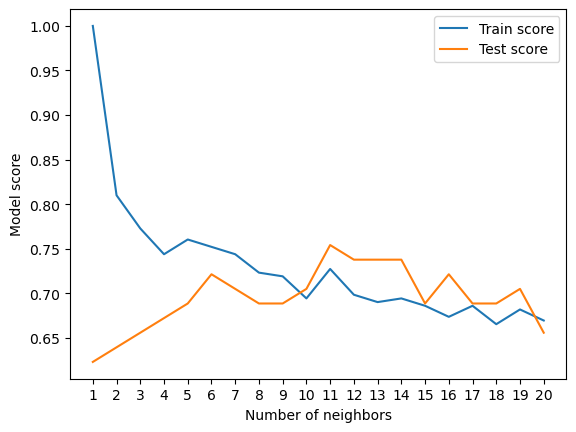

In [57]:
plt.plot(neighbors , train_scores , label="Train score")
plt.plot(neighbors , test_scores , label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}% ")

# it is not working

In [71]:
# let us tune the hyper parameters with randomizedSearchCV for logistricRegressin and RandomForestClassifier

# grid for logistic-reg
log_reg_grid ={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# grid for random_forest

rf_grid ={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None , 3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}



In [64]:
np.random.seed(42)

rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                                  param_distributions = log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [65]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [66]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [72]:
np.random.seed(42)

rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions = rf_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [73]:
rs_rf.best_params_


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [74]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [76]:
# tuning logisticregression model

log_reg_grid ={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

gs_log_reg  = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose = True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [77]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [78]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# evaluating our machine learning mode

In [81]:
y_preds = gs_log_reg.predict(x_test)

In [90]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

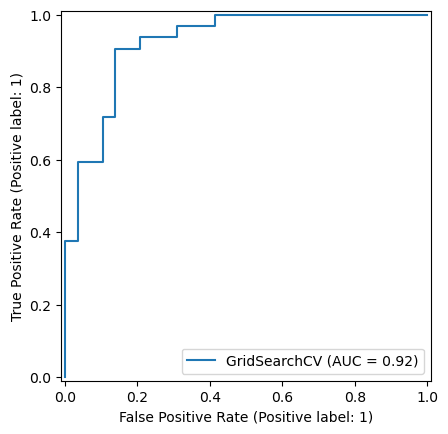

In [94]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=x_test, 
                               y=y_test); 

In [95]:
# confusion matrix

print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


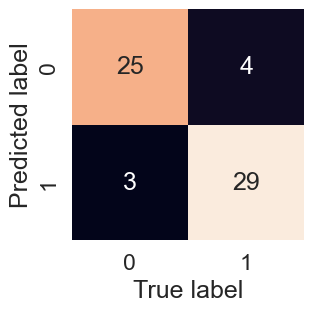

In [98]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig , ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test , y_preds)
    

In [99]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [100]:
# cross validation

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [105]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)


cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)



cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)


cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)

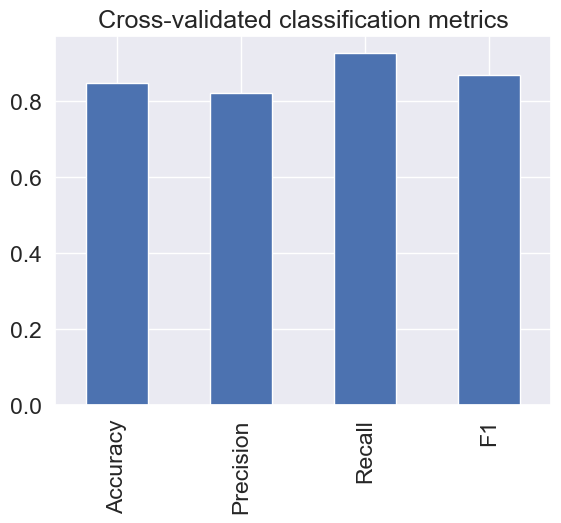

In [108]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);

In [109]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [110]:
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [112]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

<Axes: title={'center': 'Feature Importance'}>

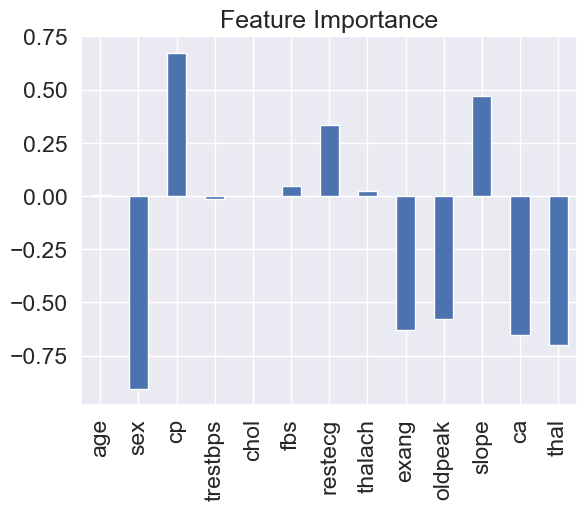

In [114]:
# visualizing the feature importance

featue_df = pd.DataFrame(feature_dict , index=[0])
featue_df.T.plot.bar(title="Feature Importance" , legend=False)

### Final score of our heart disease pediction model

In [118]:
gs_log_reg.score(x_test,y_test) * 100

88.52459016393442